In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import wealth_index as wi
import scipy.stats as sp

In [2]:
returns = wi.get_hfi_returns()
returns = wi.return_serie(returns)

In [3]:
returns.head()

,Convertible Arbitrage,CTA Global,Distressed Securities,Emerging Markets,Equity Market Neutral,Event Driven,Fixed Income Arbitrage,Global Macro,Long/Short Equity,Merger Arbitrage,Relative Value,Short Selling,Funds Of Funds
date,,,,,,,,,,,,,
1997-01,0.0119,0.0393,0.0178,0.0791,0.0189,0.0213,0.0191,0.0573,0.0281,0.0150,0.0180,-0.0166,0.0317
1997-02,0.0123,0.0298,0.0122,0.0525,0.0101,0.0084,0.0122,0.0175,-0.0006,0.0034,0.0118,0.0426,0.0106
1997-03,0.0078,-0.0021,-0.0012,-0.0120,0.0016,-0.0023,0.0109,-0.0119,-0.0084,0.0060,0.0010,0.0778,-0.0077
1997-04,0.0086,-0.0170,0.0030,0.0119,0.0119,-0.0005,0.0130,0.0172,0.0084,-0.0001,0.0122,-0.0129,0.0009
1997-05,0.0156,-0.0015,0.0233,0.0315,0.0189,0.0346,0.0118,0.0108,0.0394,0.0197,0.0173,-0.0737,0.0275


In [4]:
returns.info()

<class 'wealth_index.return_serie'>
PeriodIndex: 263 entries, 1997-01 to 2018-11
Freq: M
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Convertible Arbitrage   263 non-null    float64
 1   CTA Global              263 non-null    float64
 2   Distressed Securities   263 non-null    float64
 3   Emerging Markets        263 non-null    float64
 4   Equity Market Neutral   263 non-null    float64
 5   Event Driven            263 non-null    float64
 6   Fixed Income Arbitrage  263 non-null    float64
 7   Global Macro            263 non-null    float64
 8   Long/Short Equity       263 non-null    float64
 9   Merger Arbitrage        263 non-null    float64
 10  Relative Value          263 non-null    float64
 11  Short Selling           263 non-null    float64
 12  Funds Of Funds          263 non-null    float64
dtypes: float64(13)
memory usage: 28.8 KB


<AxesSubplot:xlabel='date'>

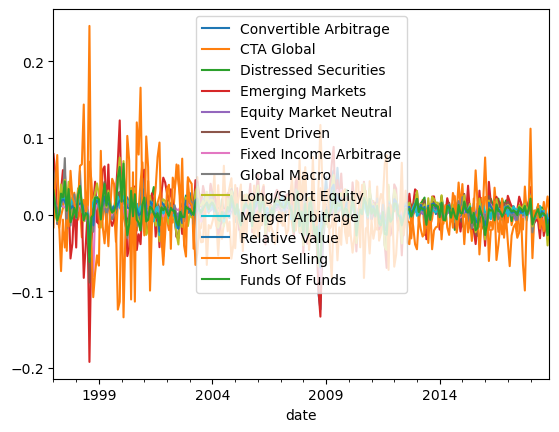

In [5]:
returns.plot()

In [6]:
skew_returns = pd.concat(
    {
        "mean":       returns.mean(), 
        "median":     returns.median(), 
        "diff":       returns.mean() - returns.median(),
        "skew":       returns.skewness(),
        "skew_sp":    pd.Series(sp.skew(returns), returns.columns),
        "kurt":       returns.kurtosis(),
        "kurt_sp":    pd.Series(sp.stats.kurtosis(returns)+3, returns.columns),
        "is_normal":  returns.is_normal()
    }, axis=1
)
skew_returns

,mean,median,diff,skew,skew_sp,kurt,kurt_sp,is_normal
Convertible Arbitrage,0.005508,0.0065,-0.000992,-2.639592,-2.639592,23.280834,23.280834,False
CTA Global,0.004074,0.0014,0.002674,0.173699,0.173699,2.952960,2.952960,True
Distressed Securities,0.006946,0.0089,-0.001954,-1.300842,-1.300842,7.889983,7.889983,False
Emerging Markets,0.006253,0.0096,-0.003347,-1.167067,-1.167067,9.250788,9.250788,False
Equity Market Neutral,0.004498,0.0051,-0.000602,-2.124435,-2.124435,17.218555,17.218555,False
Event Driven,0.006344,0.0084,-0.002056,-1.409154,-1.409154,8.035828,8.035828,False
Fixed Income Arbitrage,0.004365,0.0055,-0.001135,-3.940320,-3.940320,29.842199,29.842199,False
Global Macro,0.005403,0.0038,0.001603,0.982922,0.982922,5.741679,5.741679,False
Long/Short Equity,0.006331,0.0079,-0.001569,-0.390227,-0.390227,4.523893,4.523893,False
Merger Arbitrage,0.005356,0.0060,-0.000644,-1.320083,-1.320083,8.738950,8.738950,False


[]

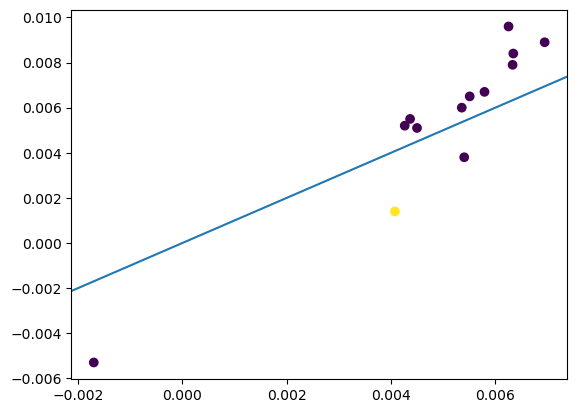

In [7]:
fig, ax = plt.subplots()
ax.scatter(x = skew_returns["mean"], y = skew_returns["median"], c = skew_returns["is_normal"])
ax.axline((0, 0), slope=1)
ax.plot()

$$ S(R) = \dfrac{E[(R-E(R))^3]}{\sigma_{R}^{3}} $$

In [8]:
sp.skew(np.random.normal(0, 0.15, 263))

0.05221658515796044

In [9]:
returns.median()

Convertible Arbitrage     0.0065
CTA Global                0.0014
Distressed Securities     0.0089
Emerging Markets          0.0096
Equity Market Neutral     0.0051
Event Driven              0.0084
Fixed Income Arbitrage    0.0055
Global Macro              0.0038
Long/Short Equity         0.0079
Merger Arbitrage          0.0060
Relative Value            0.0067
Short Selling            -0.0053
Funds Of Funds            0.0052
dtype: float64

In [10]:
pd.Series(sp.skew(returns), returns.columns)

Convertible Arbitrage    -2.639592
CTA Global                0.173699
Distressed Securities    -1.300842
Emerging Markets         -1.167067
Equity Market Neutral    -2.124435
Event Driven             -1.409154
Fixed Income Arbitrage   -3.940320
Global Macro              0.982922
Long/Short Equity        -0.390227
Merger Arbitrage         -1.320083
Relative Value           -1.815470
Short Selling             0.767975
Funds Of Funds           -0.361783
dtype: float64

In [11]:
type(returns.mean())

pandas.core.series.Series

In [12]:
pd.Series({i: sp.stats.jarque_bera(returns).pvalue > 0.01 for i in returns.columns})

Convertible Arbitrage     False
CTA Global                False
Distressed Securities     False
Emerging Markets          False
Equity Market Neutral     False
Event Driven              False
Fixed Income Arbitrage    False
Global Macro              False
Long/Short Equity         False
Merger Arbitrage          False
Relative Value            False
Short Selling             False
Funds Of Funds            False
dtype: bool